# Importing the libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 

In [2]:
retail_sales = pd.read_csv("retail_sales - retail_sales.csv.csv" )
column_names=retail_sales.head(0)
print(column_names)

Empty DataFrame
Columns: [TransactionID, Date, StoreID, ProductID, Quantity, UnitPrice, CustomerID, PaymentMethod, ProductCategory]
Index: []


### checking the duplicates and remove empty values

In [3]:
retail_sales = retail_sales.drop_duplicates().dropna()


###  converting the data columns

In [4]:
retail_sales['Date'] = pd.to_datetime(retail_sales["Date"])
retail_sales['Quantity'] = pd.to_numeric(retail_sales['Quantity'])
retail_sales['UnitPrice'] = pd.to_numeric(retail_sales['UnitPrice'])
print(retail_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    5002 non-null   object        
 1   Date             5002 non-null   datetime64[ns]
 2   StoreID          5002 non-null   object        
 3   ProductID        5002 non-null   object        
 4   Quantity         5002 non-null   int64         
 5   UnitPrice        5002 non-null   int64         
 6   CustomerID       5002 non-null   object        
 7   PaymentMethod    5002 non-null   object        
 8   ProductCategory  5002 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 351.8+ KB
None


### removing negative values in quantity and unitprice

In [5]:
retail_sales = retail_sales[retail_sales["Quantity"] >= 0]
retail_sales = retail_sales[retail_sales["UnitPrice"] >= 0]

### creating a TotalPrice column

In [6]:
# retail_sales['TotalPrice'] = retail_sales['Quantity'] * retail_sales['UnitPrice']
retail_sales['TotalPrice'] = np.multiply(retail_sales["Quantity"], retail_sales["UnitPrice"])

### extract Year, Month, DayOfWeek

In [7]:
retail_sales['Year'] = retail_sales['Date'].dt.year
retail_sales['Month'] = retail_sales['Date'].dt.month
retail_sales['DayOfWeek'] = retail_sales['Date'].dt.day_name()

### dayofweek return 0 for Monday, 1 for Tuesday ... 6 for Sunday

In [11]:
retail_sales["DayType"] = retail_sales["Date"].dt.dayofweek
retail_sales["DayType"] = np.where(
    (retail_sales["DayType"] == 5) | (retail_sales["DayType"] == 6),
    "WeekEnd",
    "WeekDay"
)

first10 = retail_sales.head(10)
print(first10)

   TransactionID       Date StoreID ProductID  Quantity  UnitPrice CustomerID  \
2          T0001 2023-07-11    S003      P001         4       1496       C271   
3          T0002 2023-10-04    S004      P002         2       1069       C305   
4          T0003 2023-06-10    S005      P019         1        966       C391   
5          T0004 2023-11-10    S002      P014         5        488       C211   
6          T0005 2023-01-22    S003      P020         3       1065       C168   
7          T0006 2023-09-10    S004      P010         4       1130       C283   
8          T0007 2023-08-24    S004      P009         2        547       C296   
9          T0008 2023-12-11    S001      P010         1        218       C226   
10         T0009 2023-02-18    S001      P006         1       1038       C275   
11         T0010 2023-02-28    S002      P017         5        610       C362   

   PaymentMethod ProductCategory  TotalPrice  Year  Month  DayOfWeek  DayType  
2           Cash         Pri

### total sales of the years

In [12]:
total_sales_of_year = retail_sales["TotalPrice"].sum()
print(total_sales_of_year)

11706475


### Group  Product and sum them then find the top 5

In [13]:
product_sales = retail_sales.groupby("ProductCategory")["TotalPrice"].sum()
top5_products = product_sales.sort_values(ascending=False).head(5)
print(top5_products)

ProductCategory
Monitor       2963723
Smartwatch    1776777
Printer       1726854
Camera        1259526
Smartphone    1159387
Name: TotalPrice, dtype: int64


### Sum total sales per month

In [14]:
monthly_sales = retail_sales.groupby("Month")["TotalPrice"].sum()
highest_sales = monthly_sales.max() 
best_month = monthly_sales.idxmax()
print(best_month,highest_sales)

4 1055991


### The most common payment method

In [16]:
most_common_payment_method = retail_sales["PaymentMethod"].mode()[0]
print(most_common_payment_method)

Online


### Average order value per store

In [17]:
avg_order_per_store = retail_sales.groupby("StoreID")["TotalPrice"].mean()
print(avg_order_per_store)

StoreID
S001    2350.111002
S002    2314.704225
S003    2347.863445
S004    2316.641684
S005    2378.735621
Name: TotalPrice, dtype: float64


### Plot line chart

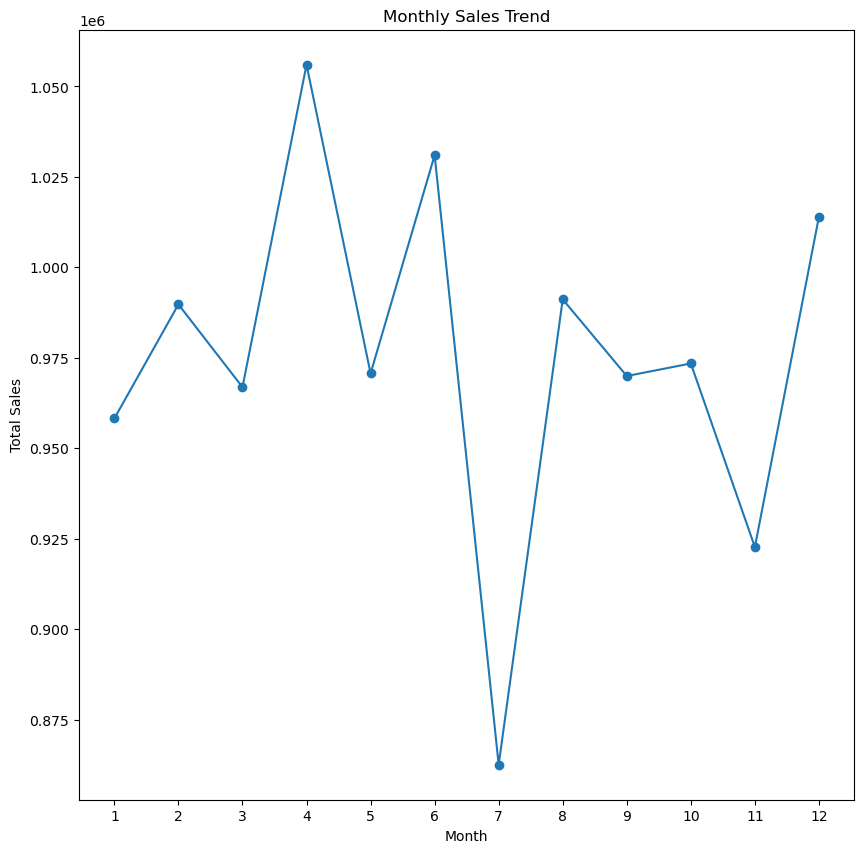

In [37]:
%matplotlib inline 
# %matplotlib ensures the plots appear directly below your code cell

#  setup the plot
fig, ax = plt.subplots(figsize = (10, 10)) # the width and height 
# plot data
ax.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(monthly_sales.index)  # show all months
# plt.grid(True)
plt.show()

### Bar chart: Top 5 products by revenue

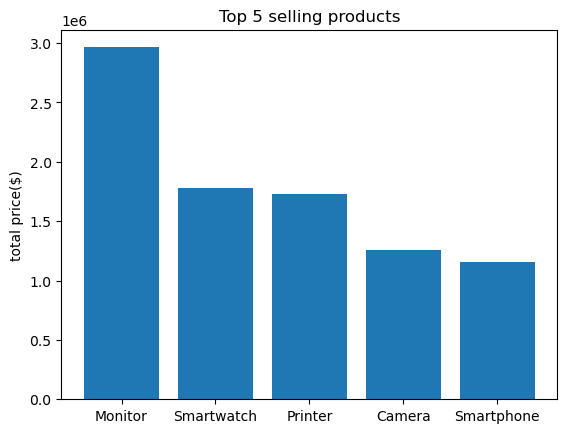

In [29]:
fig,ax=plt.subplots()
ax.bar(top5_products.index, top5_products.values)
ax.set(title="Top 5 selling products",
       ylabel="total price($)"
       );

### Pie chart: Sales distribution by payment method

In [ ]:
# suming the total sales by payment method
payment_method = retail_sales.groupby("PaymentMethod")["TotalPrice"].sum()
print(payment_method)

PaymentMethod
Card      3781429
Cash      3870940
Online    4054106
Name: TotalPrice, dtype: int64


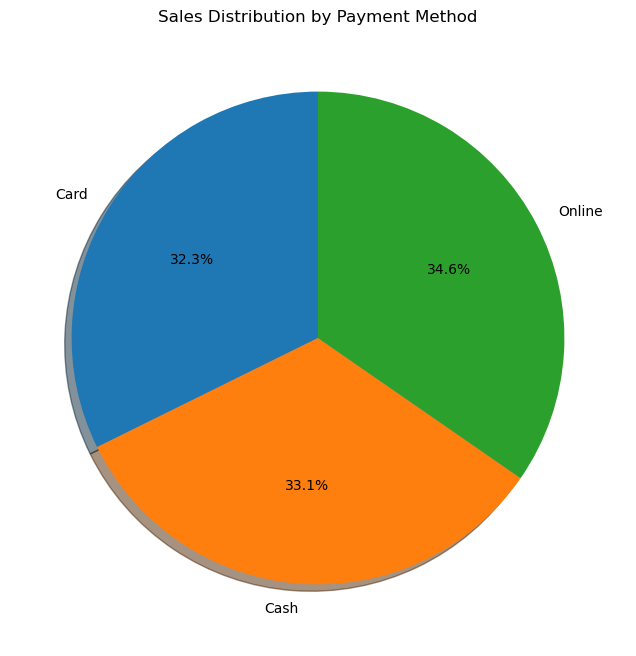

In [ ]:
# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    payment_method, 
    labels= payment_method.index, 
    autopct="%1.1f%%",   # show percentages
    startangle=90,       # rotate start
    shadow=True
)
plt.title("Sales Distribution by Payment Method")
plt.show()

### Histogram: Distribution of order values

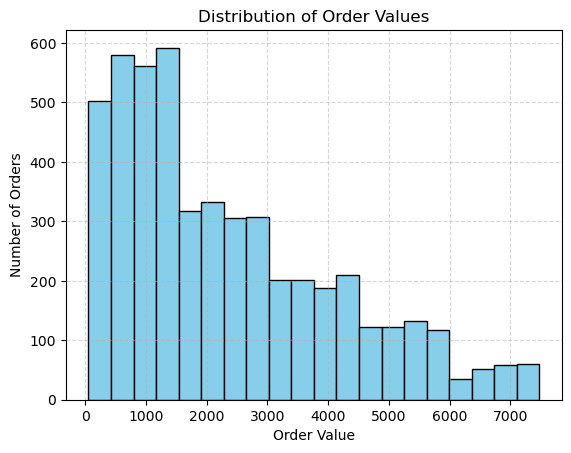

In [36]:
fig, ax=plt.subplots()
ax.hist(retail_sales['TotalPrice'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Order Values")
plt.xlabel("Order Value")
plt.ylabel("Number of Orders")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Grouped bar chart: Monthly sales per store

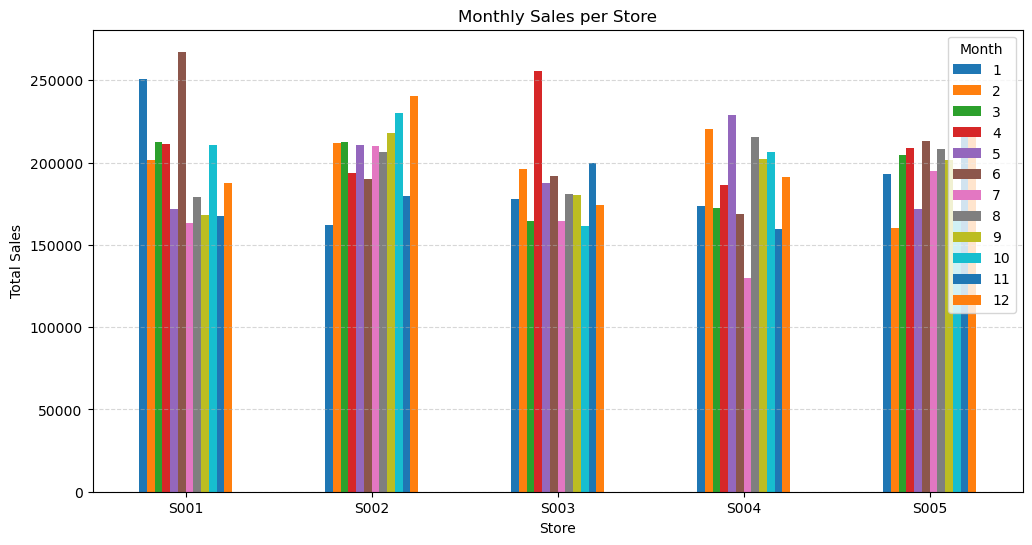

In [39]:
# Aggregate sales: sum TotalPrice by Store and Month
monthly_store_sales = retail_sales.groupby(["StoreID", "Month"])["TotalPrice"].sum().unstack()

# Plot grouped bar chart
monthly_store_sales.plot(kind='bar', figsize=(12,6))
plt.title("Monthly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.legend(title="Month")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Insights on the data
1. They recorded the highest monthly sales in April and the least in Jully
2. Monitors were the highest in demand products and smartphones were the lowest
3. With little differences, most payments were done online
4. They had the maximum number of orders around 1000 to 2000
5. S001 had more sale in june, S002 had more sales in December, S003 had more sales in April, S004 had more sales in May, S004 had more sales in November and December

### Business actions to take
1. Focus on improving online payments and maybe delivery 
2. Improve and focus on products that have a price range of 1000 to 2000
3. 